<a href="https://colab.research.google.com/github/jlprochno/API-Hotel/blob/main/Modelo_NATURAL_LANGUAGE_PROCESSING_Fake_News.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--2025-08-29 23:44:24--  https://raw.githubusercontent.com/roneysco/Fake.br-Corpus/master/preprocessed/pre-processed.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20434897 (19M) [text/plain]
Saving to: ‘pre-processed.csv.17’

pre-processed.csv.1 100%[===================>]  19.49M  91.9MB/s    in 0.2s    

2025-08-29 23:44:24 (91.9 MB/s) - ‘pre-processed.csv.17’ saved [20434897/20434897]



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                                text label
0  katia abreu diz vai colocar expulsao moldura n...  fake
1  ray peita bolsonaro conservador fake entrevist...  fake
2  reinaldo azevedo desmascarado policia federal ...  fake
3  relatorio assustador bndes mostra dinheiro pub...  fake
4  radialista americano fala sobre pt vendem ilus...  fake
Total de features (unigramas, bigramas e trigramas) utilizadas: 2960820
Acurácia do modelo: 0.8822222222222222
              precision    recall  f1-score   support

        fake       0.99      0.77      0.87       900
        true       0.81      0.99      0.89       900

    accuracy                           0.88      1800
   macro avg       0.90      0.88      0.88      1800
weighted avg       0.90      0.88      0.88      1800



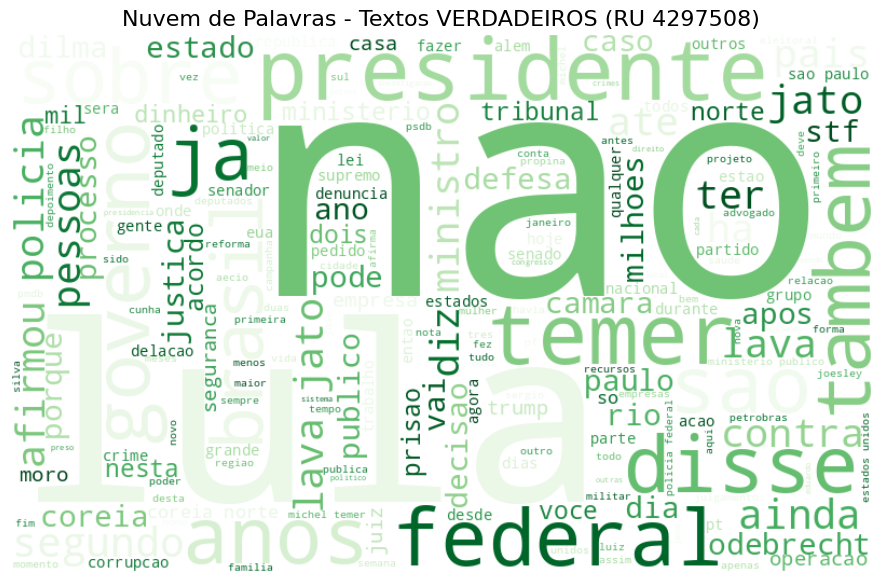

In [ ]:
# ==============================================================================
# ATIVIDADE PRÁTICA DE NATURAL LANGUAGE PROCESSING - UNINTER
# Aluno: JENYFFER LAURA PROCHNO PEREIRA
# Identificador Pessoal
ru_aluno_4297508 = "4297508"
# ==============================================================================
#
# --- INSERÇÃO DO ARQUIVO DE NOTICIAS NO GOOGLE COLAB ---
!wget https://raw.githubusercontent.com/roneysco/Fake.br-Corpus/master/preprocessed/pre-processed.csv

# ==========================
# Questão 01 - Modelo NATURAL LANGUAGE PROCESSING Fake News (Textos VERDADEIROS)
# ==========================

# --- IMPORTAÇÕES DAS BIBLIOTECAS ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# --- BAIXANDO RECURSOS DO NATURAL LANGUAGE TOOLKIT ---
nltk.download('stopwords') #Não carrega palavras "inúteis" para o contexto da análise
stop_words = stopwords.words("portuguese") #Importa do NLTK a lista de stopwords para o idioma português.

# --- IDENTIFICADOR PESSOAL ---
RU4297508 = "4297508"

# --- CARREGAR DATASET ---
df = pd.read_csv("pre-processed.csv")

# --- CORREÇÃO DAS COLUNAS DO DATASET ---
df = df[["preprocessed_news", "label"]]
df.rename(columns={"preprocessed_news": "text"}, inplace=True)

print(df.head())

# --- PRÉ-PROCESSAMENTO ---
X = df["text"]
y = df["label"]

# Divisão treino/teste (75% treino, 25% teste)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, stratify=y, random_state=42
)

# --- VETORIZAÇÃO TF-IDF ---
vectorizer = TfidfVectorizer(
    lowercase=True,
    stop_words=stop_words,
    ngram_range=(1, 3),  # captura unigramas, bigramas e trigramas
)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# --- ADICIONADO: IMPRIMIR A CONTAGEM DE FEATURES ---
num_features = X_train_vec.shape[1]
print(f"Total de features (unigramas, bigramas e trigramas) utilizadas: {num_features}")

# --- MODELO ---
model = LogisticRegression(max_iter=200)
model.fit(X_train_vec, y_train)

# --- AVALIAÇÃO ---
y_pred = model.predict(X_test_vec)
acc = accuracy_score(y_test, y_pred)
print("Acurácia do modelo:", acc)
print(classification_report(y_test, y_pred))

# --- NUVEM DE PALAVRAS (apenas textos VERDADEIROS) ---
real_texts = df[df["label"]=="true"]["text"] # Filtrar apenas textos VERDADEIROS

# --- VECTORIZER PARA A NUVEM DE PALAVRAS ---
vectorizer_wc = TfidfVectorizer(
    lowercase=True,
    stop_words=stop_words,
    ngram_range=(1,3),
    max_features=5000   #LIMITANDO A VISUALIZAÇÃO
)

tfidf_real = vectorizer_wc.fit_transform(real_texts)

# --- OBTER PESES MÉDIOS DAS PALAVRAS NO CORPUS REAL ---
mean_tfidf = np.asarray(tfidf_real.mean(axis=0)).ravel()
vocab = vectorizer_wc.get_feature_names_out()
tfidf_dict = dict(zip(vocab, mean_tfidf))

# --- GERAR NUVEM DE PALAVRAS ---
wc = WordCloud(width=800, height=500, background_color="white",
               colormap="Greens").generate_from_frequencies(tfidf_dict)

plt.figure(figsize=(12,7))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title(f"Nuvem de Palavras - Textos VERDADEIROS (RU {RU4297508})", fontsize=16)
plt.show()



--2025-08-30 00:00:02--  https://raw.githubusercontent.com/roneysco/Fake.br-Corpus/master/preprocessed/pre-processed.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20434897 (19M) [text/plain]
Saving to: ‘pre-processed.csv’

pre-processed.csv   100%[===================>]  19.49M  76.5MB/s    in 0.3s    

2025-08-30 00:00:02 (76.5 MB/s) - ‘pre-processed.csv’ saved [20434897/20434897]



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Total de features (palavras, bigramas e trigramas) usadas no modelo: 2960820

--- AVALIAÇÃO DO MODELO ---
Acurácia do modelo: 0.8822
Relatório de Classificação:
              precision    recall  f1-score   support

        fake       0.99      0.77      0.87       900
        true       0.81      0.99      0.89       900

    accuracy                           0.88      1800
   macro avg       0.90      0.88      0.88      1800
weighted avg       0.90      0.88      0.88      1800



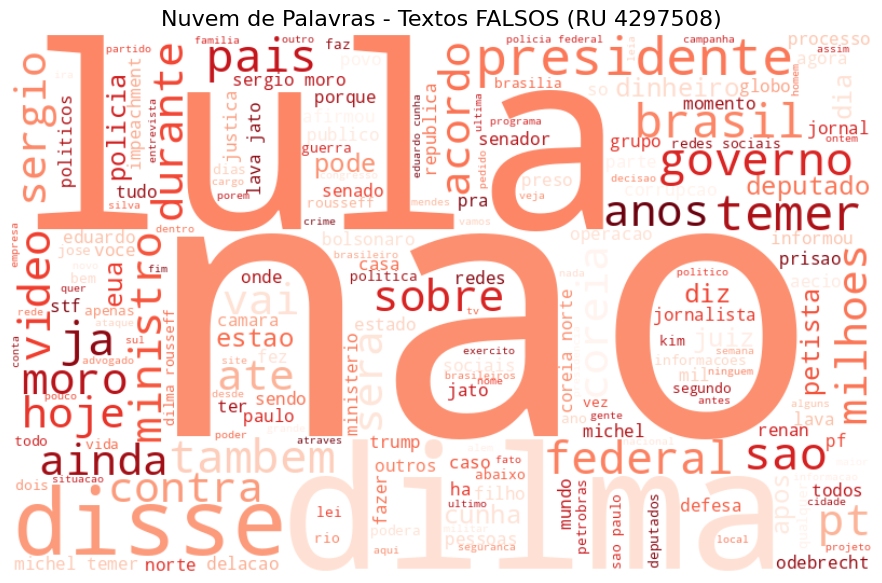

In [ ]:
# ==============================================================================
# ATIVIDADE PRÁTICA DE NATURAL LANGUAGE PROCESSING - UNINTER
# Aluno: JENYFFER LAURA PROCHNO PEREIRA
# Identificador Pessoal
ru_aluno_4297508 = "4297508"
# ==============================================================================
#
# --- DOWNLOAD DO DATASET (se executando no Google Colab) ---
!wget https://raw.githubusercontent.com/roneysco/Fake.br-Corpus/master/preprocessed/pre-processed.csv -O pre-processed.csv

# ==========================
# Questão 02 - Modelo NLP Fake News (Textos FALSOS)
# ==========================

# --- IMPORTAÇÕES DAS BIBLIOTECAS ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# --- BAIXANDO RECURSOS DO NATURAL LANGUAGE TOOLKIT ---
nltk.download('stopwords')
stop_words = stopwords.words("portuguese") # Importa do NLTK a lista de stopwords para o idioma português.

# --- IDENTIFICADOR PESSOAL ---
RU4297508 = "4297508"

# --- CARREGAR DATASET ---
df = pd.read_csv("pre-processed.csv")

# --- CORREÇÃO E SELEÇÃO DAS COLUNAS DO DATASET ---
df = df[["preprocessed_news", "label"]]
df.rename(columns={"preprocessed_news": "text"}, inplace=True)

# --- PRÉ-PROCESSAMENTO E DIVISÃO DOS DADOS ---
X = df["text"]
y = df["label"]

# Divisão treino/teste (75% treino, 25% teste), estratificada para manter a proporção
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, stratify=y, random_state=42
)

# --- VETORIZAÇÃO TF-IDF ---
# Utiliza unigramas, bigramas e trigramas e remove stopwords em português
vectorizer = TfidfVectorizer(
    lowercase=True,
    stop_words=stop_words,
    ngram_range=(1, 3)
)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# --- CONTAGEM DE FEATURES (UNIGRAMAS, BIGRAMAS E TRIGRAMAS) ---
num_features = X_train_vec.shape[1]
print(f"Total de features (palavras, bigramas e trigramas) usadas no modelo: {num_features}")

# --- TREINAMENTO DO MODELO DE CLASSIFICAÇÃO ---
model = LogisticRegression(max_iter=200) # max_iter aumentado para garantir convergência
model.fit(X_train_vec, y_train)

# --- AVALIAÇÃO DO MODELO ---
y_pred = model.predict(X_test_vec)
acc = accuracy_score(y_test, y_pred)
print("\n--- AVALIAÇÃO DO MODELO ---")
print(f"Acurácia do modelo: {acc:.4f}")
print("Relatório de Classificação:")
print(classification_report(y_test, y_pred))

# ==================================================================
# GERAÇÃO DA NUVEM DE PALAVRAS (TEXTOS FALSOS)
# ==================================================================

# --- FILTRAR APENAS OS TEXTOS MARCADOS COMO FALSOS ("fake") ---
fake_texts = df[df["label"] == "fake"]["text"]

# --- CRIAR UM NOVO VECTORIZER APENAS PARA A NUVEM DE PALAVRAS ---
# Isso permite controlar o número de features na nuvem sem afetar o modelo
vectorizer_wc_fake = TfidfVectorizer(
    lowercase=True,
    stop_words=stop_words,
    ngram_range=(1, 3),
    max_features=5000  # Limita o número de termos na nuvem para melhor visualização
)

tfidf_fake = vectorizer_wc_fake.fit_transform(fake_texts)

# --- CALCULAR A IMPORTÂNCIA MÉDIA DE CADA TERMO (TF-IDF) NOS TEXTOS FALSOS ---
mean_tfidf_fake = np.asarray(tfidf_fake.mean(axis=0)).ravel()
vocab_fake = vectorizer_wc_fake.get_feature_names_out()
tfidf_dict_fake = dict(zip(vocab_fake, mean_tfidf_fake))

# --- GERAR E EXIBIR A NUVEM DE PALAVRAS ---
wc_fake = WordCloud(
    width=800,
    height=500,
    background_color="white",
    colormap="Reds"
).generate_from_frequencies(tfidf_dict_fake)

plt.figure(figsize=(12, 7))
plt.imshow(wc_fake, interpolation="bilinear")
plt.axis("off")
plt.title(f"Nuvem de Palavras - Textos FALSOS (RU {RU4297508})", fontsize=16)
plt.show()